In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
from wordcloud import WordCloud
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from imblearn.under_sampling import RandomUnderSampler
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [ ]:
CyBully = pd.read_csv("CyberBullying.csv")

In [ ]:
CyBully.head()

,Text,CB_Label
0,damn there is someones nana up here at beach w...,0
1,no kidding! dick clark was a corpse mechanical...,0
2,i read an article on jobros and thought damn w...,0
3,I got one fucking day of sprinkles and now it'...,0
4,I was already listening to Elliott smith and ...,0


In [ ]:
CyBully.describe()

,CB_Label
count,11100.000000
mean,0.500000
std,0.500023
min,0.000000
25%,0.000000
50%,0.500000
75%,1.000000
max,1.000000


In [ ]:
CyBully.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11100 entries, 0 to 11099
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Text      11100 non-null  object
 1   CB_Label  11100 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 173.6+ KB


In [ ]:
# CHECK FOR MISSING VALUES
CyBully.isnull().sum()

Text        0
CB_Label    0
dtype: int64

PREPROCESSING STEPS
Creating fucntions to perform each task of preprocesssing needed


In [ ]:
stopwords = set(stopwords.words('english'))
punctuation = set(string.punctuation)
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):

    tokens = word_tokenize(text)

    tokens = [lemmatizer.lemmatize(token.lower()) for token in tokens if token.lower() not in stopwords and token not in punctuation]

    preprocessed_text = ' '.join(tokens)

    return preprocessed_text

In [ ]:
CyBully['preprocessed_text'] = CyBully['Text'].apply(preprocess_text)

In [ ]:
CyBully.head()

,Text,CB_Label,preprocessed_text
0,damn there is someones nana up here at beach w...,0,damn someone nana beach one dont think ic stea...
1,no kidding! dick clark was a corpse mechanical...,0,kidding dick clark corpse mechanically operate...
2,i read an article on jobros and thought damn w...,0,read article jobros thought damn cash jobro po...
3,I got one fucking day of sprinkles and now it'...,0,got one fucking day sprinkle 's back sunshine ...
4,I was already listening to Elliott smith and ...,0,already listening elliott smith fucking hate k...


In [ ]:
# VECTORIZARITION
vectorizer = CountVectorizer()
X=vectorizer.fit_transform(CyBully['preprocessed_text'])
X=pd.DataFrame(X.toarray())
X.head()

,0,1,2,3,4,5,6,7,8,9,...,16449,16450,16451,16452,16453,16454,16455,16456,16457,16458
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
#CHECK IMBALANCE IN CLASSS LABEL
CyBully.CB_Label.value_counts()

0    5550
1    5550
Name: CB_Label, dtype: int64

In [ ]:
y = CyBully['CB_Label']
X_train, X_test, y_train, y_test = train_test_split(
    X,y, train_size=0.8,random_state=42)

In [ ]:
model = LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

EVALUATE THE MODEL

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, ..., 1, 1, 1])

In [ ]:
acc = metrics.accuracy_score(y_test,y_pred)
acc

0.7211711711711711

In [ ]:
prec = metrics.precision_score(y_test,y_pred)
prec

0.7396149949341438

In [ ]:
cm = metrics.confusion_matrix(y_test,y_pred)
cm

array([[871, 257],
       [362, 730]])

In [ ]:
cr = metrics.classification_report(y_test,y_pred)
print(cr)

              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1128
           1       0.74      0.67      0.70      1092

    accuracy                           0.72      2220
   macro avg       0.72      0.72      0.72      2220
weighted avg       0.72      0.72      0.72      2220



SENTIMENT ANAYSIS

In [ ]:
sentiment = SentimentIntensityAnalyzer()
sentiments = []
for text in CyBully['Text']:
    senti = sentiment.polarity_scores(text)
    sentiments.append(senti)

# Convert the sentiment scores to sentiment labels
labels = []
for sentiment in sentiments:
    compound_score = sentiment['compound']
    label = 'pos' if compound_score >= 0 else 'neg'
    labels.append(label)

# Add the sentiment labels to the dataset
CyBully['Sentiment_Label'] = labels



In [ ]:
CyBully.head(50)

,Text,CB_Label,preprocessed_text,Sentiment_Label
0,damn there is someones nana up here at beach w...,0,damn someone nana beach one dont think ic stea...,neg
1,no kidding! dick clark was a corpse mechanical...,0,kidding dick clark corpse mechanically operate...,neg
2,i read an article on jobros and thought damn w...,0,read article jobros thought damn cash jobro po...,pos
3,I got one fucking day of sprinkles and now it'...,0,got one fucking day sprinkle 's back sunshine ...,pos
4,I was already listening to Elliott smith and ...,0,already listening elliott smith fucking hate k...,neg
5,I told Derek to go fuck himself Devyn told us...,0,told derek go fuck devyn told u calm,neg
6,I'm watching the new Smosh video and laughing ...,0,'m watching new smosh video laughing as,neg
7,My mom didn't like Catholicism because the ide...,0,mom n't like catholicism idea sinner birth irk...,pos
8,ya i know! lol AND big thunder mountain broke ...,0,ya know lol big thunder mountain broke got 2 r...,neg
9,"lucky bitch.....""",0,lucky bitch ..... '',pos


In [ ]:
CyBully.Sentiment_Label.value_counts()

neg    6125
pos    4975
Name: Sentiment_Label, dtype: int64

<Axes: xlabel='Sentiment_Label', ylabel='Count'>

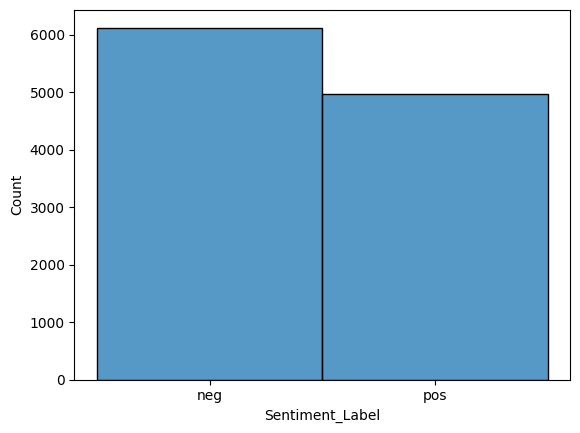

In [ ]:
sns.histplot(CyBully['Sentiment_Label'])

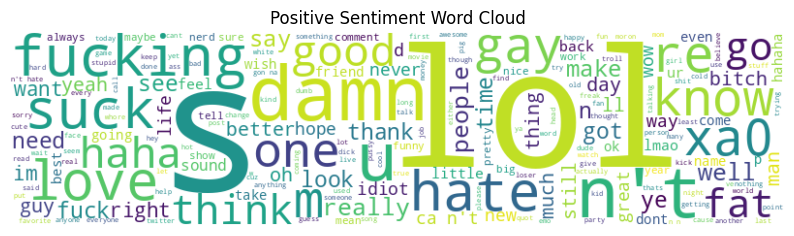

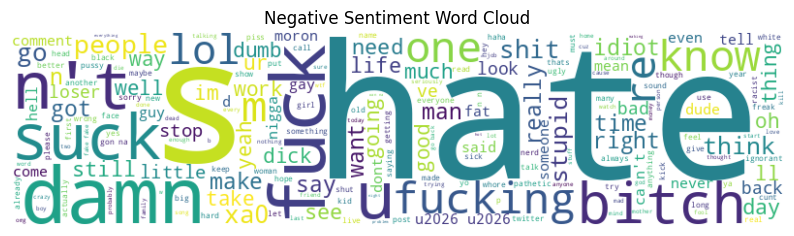

In [ ]:
positive_text = " ".join(CyBully[CyBully['Sentiment_Label'] == 'pos']['preprocessed_text'])
positive_wordcloud = WordCloud(width = 800, height = 200, background_color = 'white').generate(positive_text)

plt.figure(figsize = (10,5))
plt.imshow(positive_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Positive Sentiment Word Cloud')
plt.show()

negative_text = " ".join(CyBully[CyBully['Sentiment_Label'] == 'neg']['preprocessed_text'])
negative_wordcloud = WordCloud(width=800, height=200, background_color='white').generate(negative_text)

plt.figure(figsize = (10,5))
plt.imshow(negative_wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Negative Sentiment Word Cloud')
plt.show()